<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_%EC%98%A4%EB%8A%98%EC%9D%98%EC%BD%94%EB%94%A9_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_200205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 데이터 시각화(1/4) 200205
- 시본 플라이트 데이터셋 이용하기
- 여러가지 그래프 그리기

## 모듈 불러오기

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## 데이터셋 로드 및 내용 확인

In [2]:
df = sns.load_dataset("flights")
df.shape

(144, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## 바플롯 그리기 

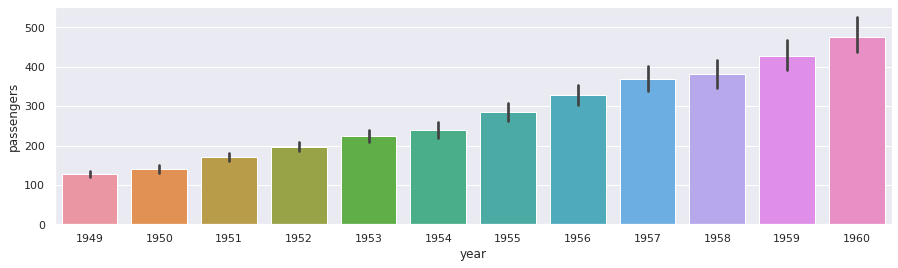

In [5]:
plt.figure(figsize=(15, 4))
sns.barplot(data = df, x = 'year', y = 'passengers')

## 라인플롯 그리기

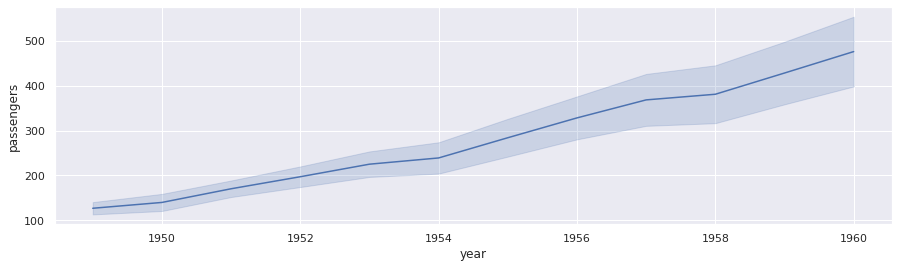

In [6]:
plt.figure(figsize=(15, 4))
sns.lineplot(data = df, x = 'year', y = 'passengers', ci = 'sd')

## 포인트플롯으로 그리기

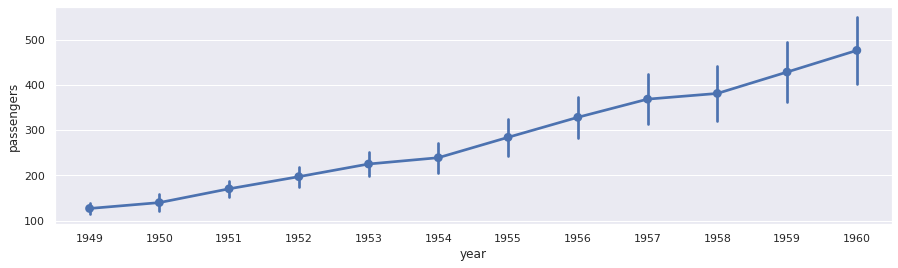

In [7]:
plt.figure(figsize=(15, 4))
sns.pointplot(data = df, x = 'year', y = 'passengers', ci = 'sd') # sd 표중편차를 나타냄

## 라인플롯에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기

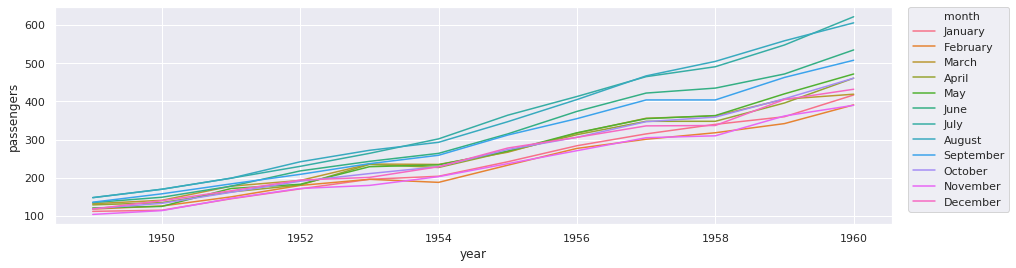

In [8]:
plt.figure(figsize=(15, 4))
sns.lineplot(data = df, x = 'year', y = 'passengers', ci = 'sd', hue = 'month') # sd 표중편차를 나타냄
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0) # 범례를 표 그래프 바깥쪽에 나타냄

## 라인 플롯에 hue를 통해 year값에 따라 여러 색으로 나눠그리기

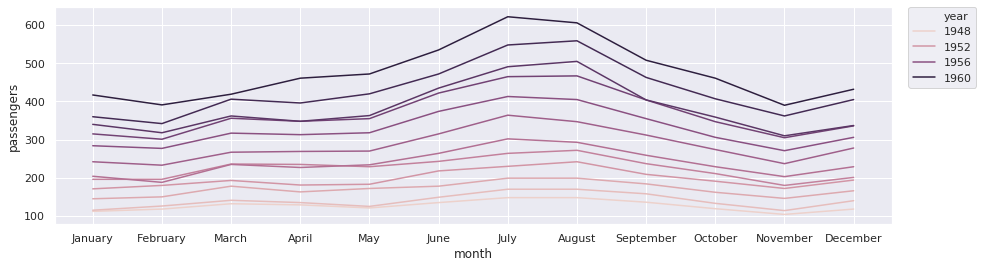

In [9]:
plt.figure(figsize=(15, 4))
sns.lineplot(data = df, x = 'month', y = 'passengers', ci = 'sd', hue = 'year') # sd 표중편차를 나타냄
plt.legend(bbox_to_anchor = (1.02, 1), loc = 2, borderaxespad = 0) # 범례를 표 그래프 바깥쪽에 나타냄

## 박스 플롯 그리기

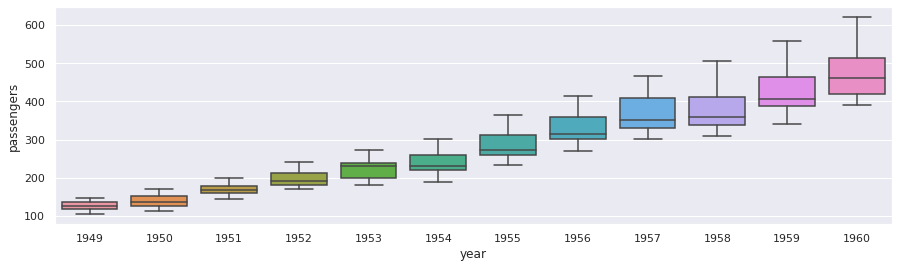

In [10]:
plt.figure(figsize = (15, 4))
sns.boxplot(data = df, x = 'year', y = 'passengers')

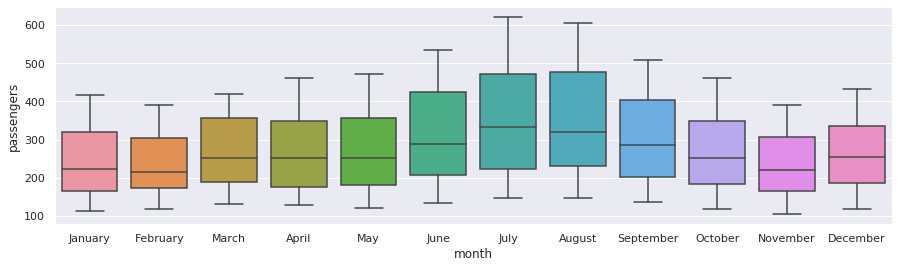

In [11]:
plt.figure(figsize = (15, 4))
sns.boxplot(data = df, x = 'month', y = 'passengers')

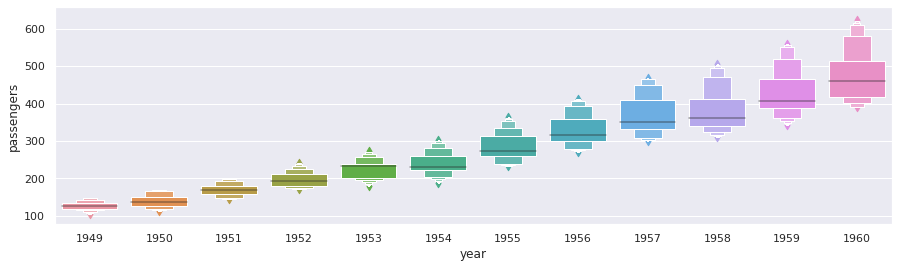

In [12]:
plt.figure(figsize = (15, 4))
sns.boxenplot(data = df, x = 'year', y = 'passengers')

## 바이올린 플롯 그리기

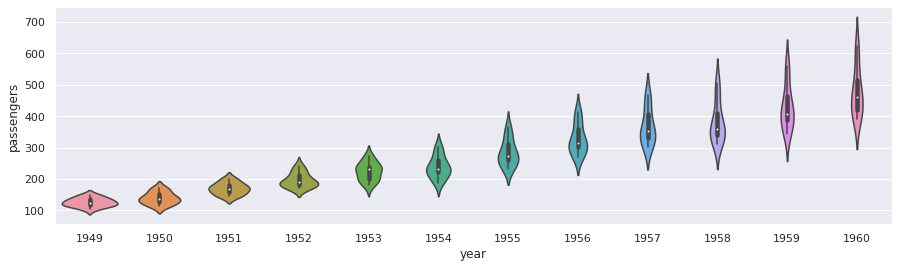

In [13]:
plt.figure(figsize=(15, 4))
sns.violinplot(data = df, x = 'year', y = 'passengers')

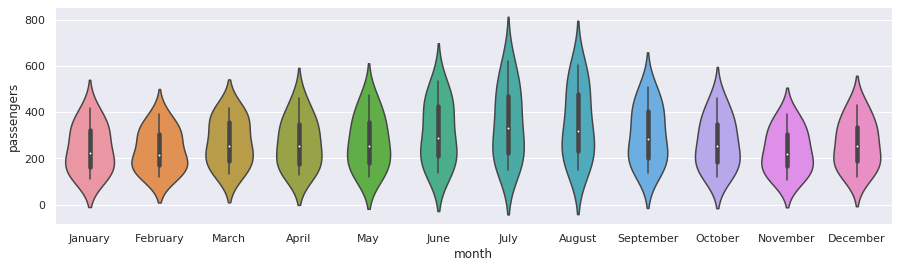

In [14]:
plt.figure(figsize=(15, 4))
sns.violinplot(data = df, x = 'month', y = 'passengers')

## 산점도 그래프 그리기

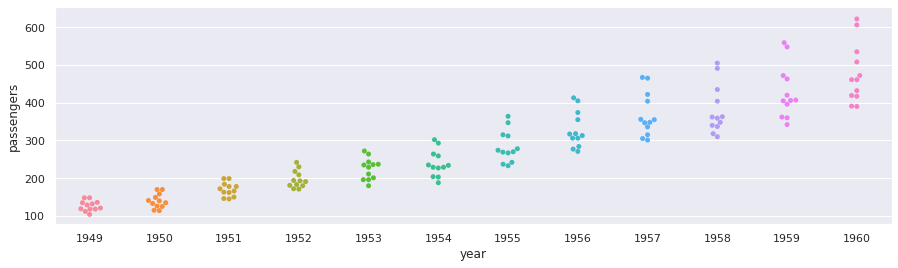

In [15]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data = df, x = 'year', y = 'passengers')

## reg 플롯 그리기

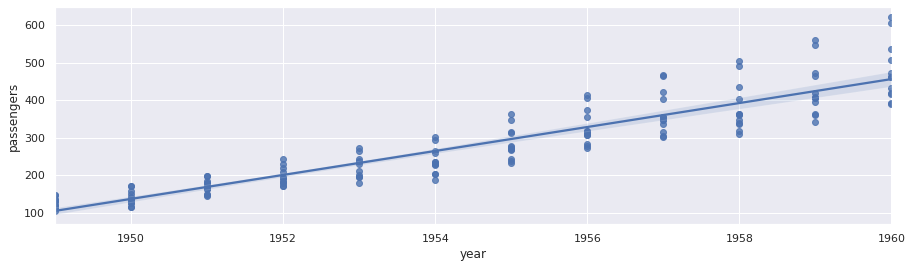

In [16]:
plt.figure(figsize = (15, 4))
sns.regplot(data = df, x = 'year', y = 'passengers')

# 시계열 데이터 시각화(2/4) 200205
- 피벗을 이용하여 데이터 형태 바꾸기

## 피벗으로 데이터 형태 바꾸기
- 피벗과 피벗테이블의 차이
    - 피벗 : 형태만 바꿈
    - 피벗 테이블 : 연산을 수행

In [17]:
df.pivot(index = 'year', columns = 'month', values= 'passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
df_h = df.pivot(index = 'month', columns = 'year', values= 'passengers')

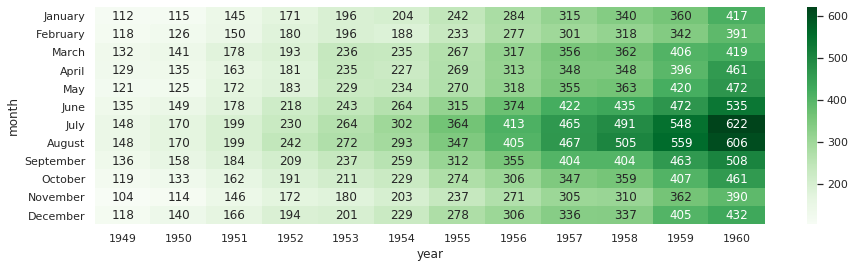

In [19]:
plt.figure(figsize = (15, 4))
sns.heatmap(df_h, annot=True, fmt = ".0f", cmap = 'Greens') # annote는 수치를 나타냄, fmt는 숫자의 형식을 보기좋게, 
# cmap는 수자가 많을 수록 진하게 표시(Blues, Reds, Greens 등등. 첫글자는 대문자)

## distplot 그리기

In [0]:
def plt_size(x, y):
    return plt.figure(figsize = (x, y))

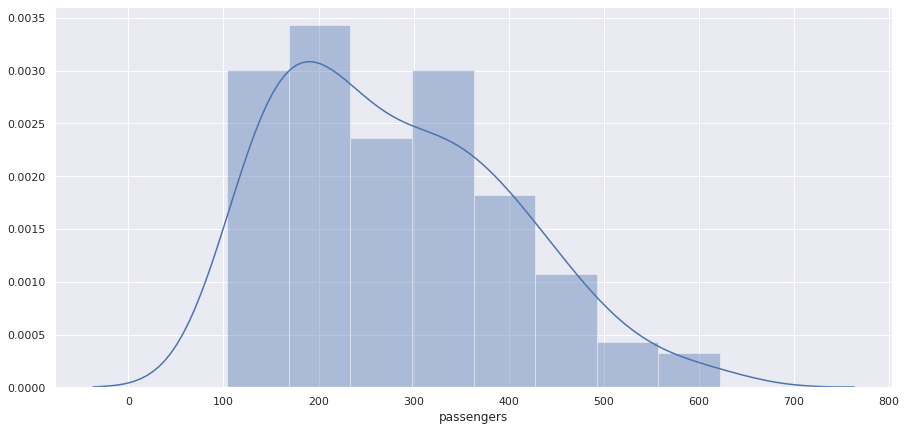

In [21]:
plt_size(15, 7)
sns.distplot(df['passengers'])

## 서브플롯 그리기

<Figure size 1080x288 with 0 Axes>

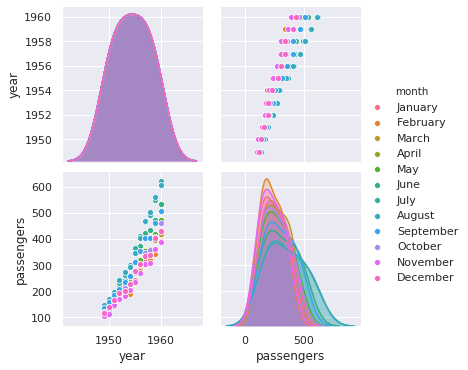

In [22]:
plt_size(15, 4)
sns.pairplot(data = df, hue = 'month')

## relplot그리기 - 산점도 그리기

<Figure size 1080x504 with 0 Axes>

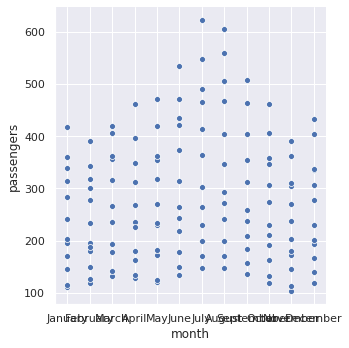

In [23]:
plt_size(15, 7)
sns.relplot(data = df, x = 'month', y = 'passengers')

<Figure size 1440x504 with 0 Axes>

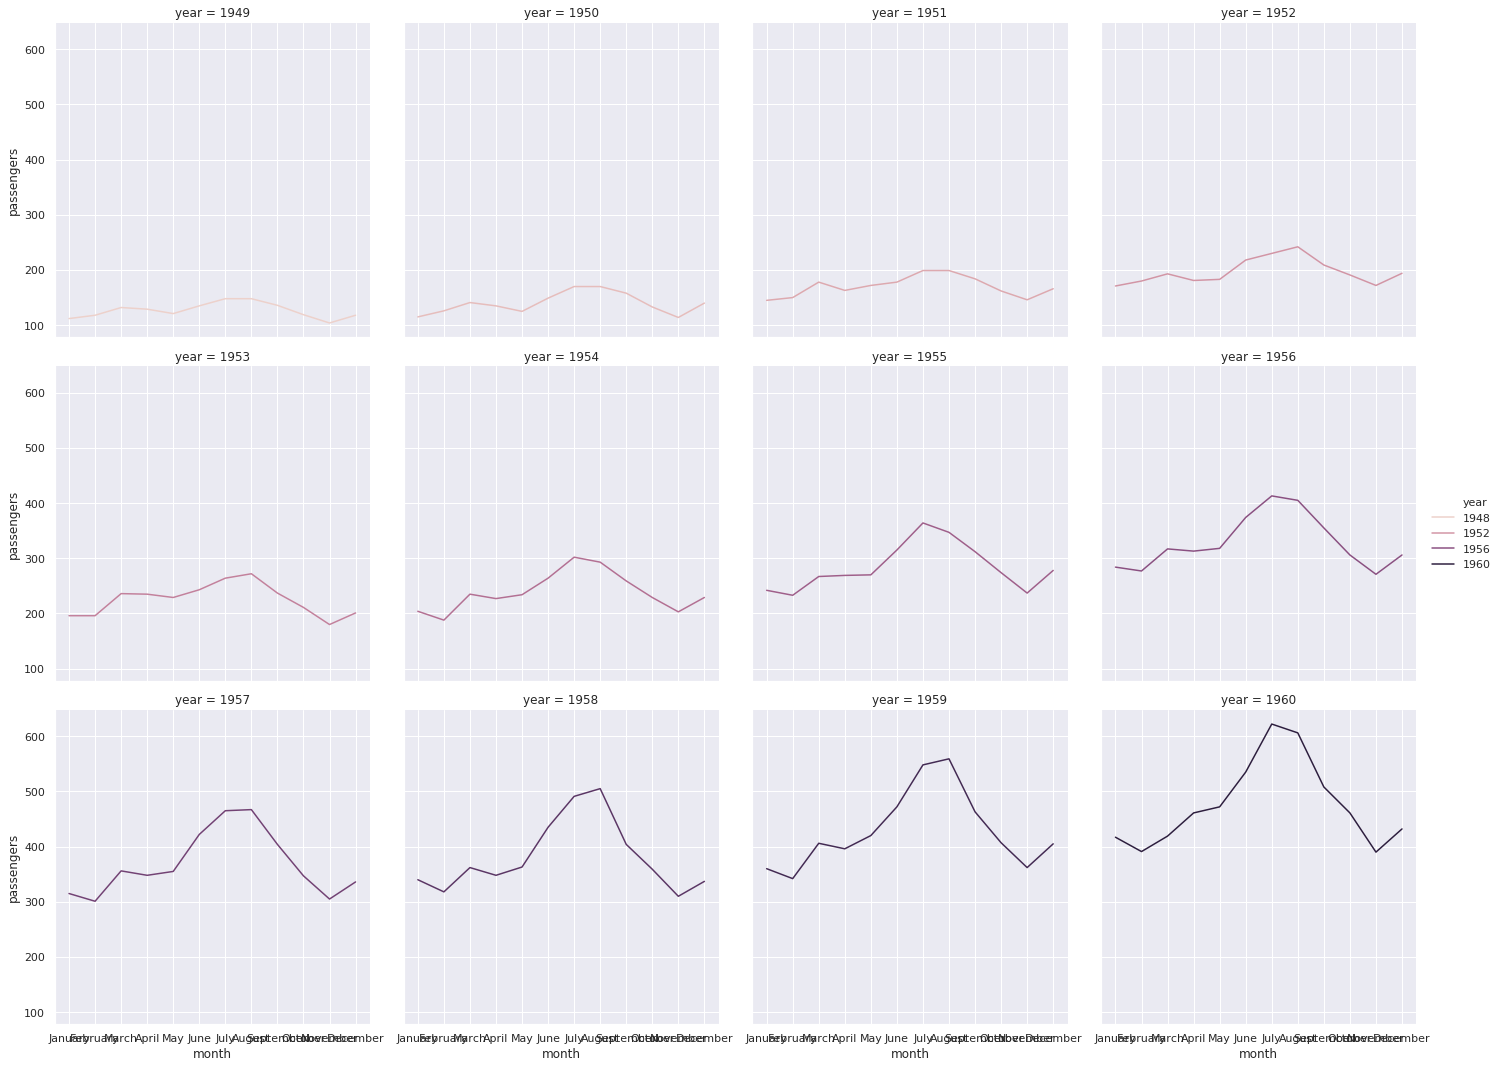

In [27]:
plt_size(20, 7)
# col 옵션은 년도별로 따로 그래프를 그림
# col_wrap는 한줄에 그릴 그래프의 갯수를 지정하기
sns.relplot(data = df, x = 'month', y = 'passengers', kind= 'line', hue = 'year', col = 'year', col_wrap=4) 


# 시계열 데이터 시각화(3/4) 200206

### 날짜 변환하기 전에 동작을 확인하고 변환 함수 만들기

In [38]:
from datetime import datetime

year = 2020
month = "March"

# strftime, strptime의 차이점 알기

s = f'{year} {month} 1'
d  = datetime.strptime(s, '%Y %B %d') # 스트링을 데이트 타입으로 변환

datetime.datetime(2020, 3, 1, 0, 0)

In [39]:
d.strftime('%Y-%m-%d') # 데이트 타임의 형식을 변환

'2020-03-01'

### find_datetime 함수를 만들어 date 형태로 변환

In [0]:
def find_datetime(row):
    year = row['year']
    month = row['month']
    s = f'{year} {month} 1'
    d  = datetime.strptime(s, '%Y %B %d') # 스트링을 데이트 타입으로 변환
    return d.strftime('%Y-%m-%d') # 데이트 타임의 형식을 변환

In [47]:
row = {'year' : 1949, 'month' : 'Janurary'}
find_datetime(row)

'1949 Janurary 1'

### apply 함수를 사용해서 위에서 만든 함수를 적용

In [52]:
df['date'] = df.apply(find_datetime, axis = 1)
df.head()

,year,month,passengers,date
0,1949,January,112,1949-01-01
1,1949,February,118,1949-02-01
2,1949,March,132,1949-03-01
3,1949,April,129,1949-04-01
4,1949,May,121,1949-05-01


### find_datetime 함수를 만들어서 date 형태로 변환

In [54]:
df['date'] = pd.to_datetime( df['date'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
date          144 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


### 라인플롯으로 그리기

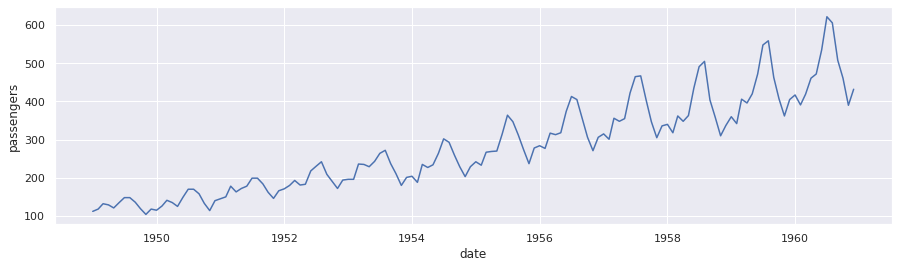

In [61]:
plt_size(15, 4)
sns.lineplot(data = df, x = 'date', y = 'passengers')